# Summary:
This is just a histogram of the previous old `dataArduino`'s sampling rate, as defined by the difference between MATLAB times between every two consecutive samples.

This `dataArduino` only adds samples in between running sections of the trial code throughout the main MATLAB ToneDiscriminationV3_GF.m code, leading to very uneven sampling, and it also sends several other bytes of irrelevant information each time (e.g. empty left and right lickspout detection data) which further slows it down.

### imports

In [3]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import re
import glob

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
import scipy.signal as signal

# interpolation because ARDUINO data is spaced unevenly
import scipy.interpolate as interpolate

# save data
import pickle

### set `folder_name`

In [4]:
# for all .mat files in this folder starting with "ToneDisc_ANChandler_p1_" in their name
folder_name = './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_'

### sort through relevant .mat files found in folder by day ("_d#")

In [5]:
unsorted_mat_files = glob.glob(folder_name+'*.mat')
sorted_mat_files = sorted(unsorted_mat_files, key=lambda x: int(re.search(r'\d+.mat$',x).group()[:-4]))
sorted_mat_files

['./Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d1.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d2.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d3.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d4.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d5.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d6.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d7.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d8.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d9.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d10.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d11.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d12.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d13.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d14.mat']

### load `data` from .mat file and split into `params` and `response`

In [28]:
mat_dict = io.loadmat("Data/AnB1/ToneDisc_ANB1_30-Oct-2023.mat")

data = mat_dict['data'][0][0]
params = data[0][0][0]
response = data[1][0][0]

### get `dataArduino` (ARDUINO data), `respMTX`, and `MTXTrialType`

In [29]:
dataArduino = response[0]
print("dataArduino shape: "+str(dataArduino.shape))

respMTX = response[2]
print("respMTX shape: "+str(respMTX.shape))

MTXTrialType = params[16]
print("MTXTrialType shape: "+str(MTXTrialType.shape))

num_trials = respMTX.shape[0]
print("number of trials: "+str(num_trials))

dataArduino shape: (345993, 7)
respMTX shape: (183, 7)
MTXTrialType shape: (1000, 5)
number of trials: 183


### Look at sampling rate and plot a histogram of the sampling rate across the entire `dataArduino`
a lever movement can be less than 100 ms

In [30]:
dts = []
for trial_i in range(0, num_trials):
    trial_respMTX = respMTX[trial_i]

    if trial_respMTX[-1] == 1:

        start_t = respMTX[trial_i][0]
        for arduino_i, arduino_t in enumerate(dataArduino[:, 0]):
            if start_t <= arduino_t:
                start_arduino_i = arduino_i
                break

        if trial_i < num_trials - 1:
            end_t = respMTX[trial_i+1][0]
            for arduino_i, arduino_t in enumerate(dataArduino[:, 0]):
                if end_t <= arduino_t:
                    end_arduino_i = arduino_i
                    break
        else:
            end_arduino_i = len(dataArduino) - 1


        trial_dataArduino = dataArduino[start_arduino_i:end_arduino_i,:]



In [46]:
old_arduino_t = dataArduino[1, 0]
for arduino_t in dataArduino[1:, 0]:
    dts.append(arduino_t - old_arduino_t)
    old_arduino_t = arduino_t

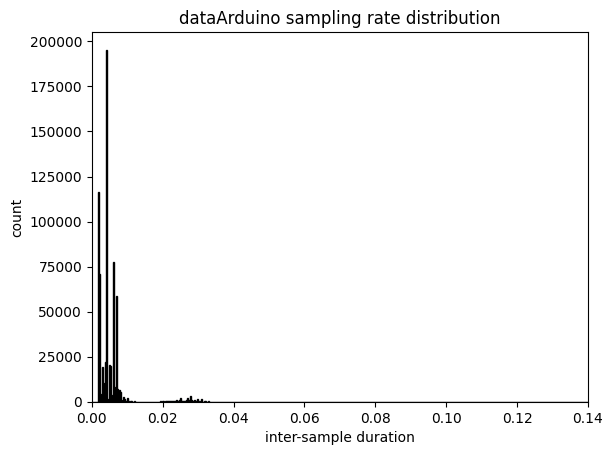

mean:  198.38423234067224  Hz
std of intersample duration:  0.004876950084407895  seconds
min:  7.0670529046647905  Hz
max:  inf  Hz
90th slowest percentile 142.91635106016963
99th slowest percentile 35.11395743277409
99.9th slowest percentile 30.399095775263422


/var/folders/r7/8qfxhsfs03nbp3j_6k4vgz600000gn/T/ipykernel_20428/888803134.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  print("max: ", 1 / min(dts), " Hz")


In [55]:
# plotting histogram of dataArduino inter-sample durations
plt.hist(dts, bins=500, edgecolor='black')
plt.xlabel('inter-sample duration')
plt.ylabel('count')
plt.xlim([0, 0.14])
plt.title("dataArduino sampling rate distribution")
plt.show()

# print out mean and std of sampling rate
print("mean: ", 1 / (sum(dts) / len(dts)), " Hz")
print("std of intersample duration: ", np.std(dts), " s")
print("min: ", 1 / max(dts), " Hz")
print("max: ", 1 / min(dts), " Hz")
print("90th slowest percentile", 1 / np.percentile(dts, 90))
print("99th slowest percentile", 1 / np.percentile(dts, 99))
print("99.9th slowest percentile", 1 / np.percentile(dts, 99.9))

In [54]:
dts[dts != 0]
len(dts)

691984